## 1. Import Relevant Packages

In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import *
from scipy import stats
import datetime as dt
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(style='white', color_codes=True, palette='Blues_r')
plt.rcParams["font.family"] = "Times New Roman"

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [2]:
# Loading Pyfolio for results

import pyfolio as pf
%matplotlib inline
import empyrical

# silence warnings
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
# Define start and end periods for results
start = '1931-01-01'
end = '2020-12-31'

#start = '2008-01-01'
#end = '2010-12-30'
#start = '2009-03-09'
#end = '2013-03-28'

## 2. Importing risk free rate

In [4]:
# Import
risk_free = pd.read_csv('risk_free_1931.csv', low_memory=False, index_col=0)
risk_free.index = pd.to_datetime(risk_free.index).tz_convert('UTC')
risk_free

,RF
date,
1931-01-02 00:00:00+00:00,0.00006
1931-01-03 00:00:00+00:00,0.00006
1931-01-05 00:00:00+00:00,0.00006
1931-01-06 00:00:00+00:00,0.00006
1931-01-07 00:00:00+00:00,0.00006
...,...
2020-12-24 00:00:00+00:00,0.00000
2020-12-28 00:00:00+00:00,0.00000
2020-12-29 00:00:00+00:00,0.00000


In [5]:
# Define start and end date
risk_free = risk_free[risk_free.index >= start]
risk_free = risk_free[risk_free.index <= end]

In [6]:
risk_free = risk_free['RF']

## 3. Importing benchmark data - Market

In [7]:
# Import
market = pd.read_csv('market_benchmark_1931.csv', low_memory=False, index_col=0)
market.index = pd.to_datetime(market.index).tz_convert('UTC')
market

,Mkt
date,
1931-01-02 00:00:00+00:00,0.03496
1931-01-03 00:00:00+00:00,0.01826
1931-01-05 00:00:00+00:00,-0.00794
1931-01-06 00:00:00+00:00,0.01516
1931-01-07 00:00:00+00:00,0.00056
...,...
2020-12-24 00:00:00+00:00,0.00210
2020-12-28 00:00:00+00:00,0.00460
2020-12-29 00:00:00+00:00,-0.00400


In [8]:
# Define start and end date
market = market[market.index >= start]
market = market[market.index <= end]

In [9]:
# Rename columns
market.rename(columns={"Mkt": "market"}, inplace=True)

In [10]:
# Sort values in asccending order
market.sort_values('market', ascending=True)

,market
date,
1987-10-19 00:00:00+00:00,-0.17413
2020-03-16 00:00:00+00:00,-0.11994
2020-03-12 00:00:00+00:00,-0.09624
1933-07-21 00:00:00+00:00,-0.09209
2008-12-01 00:00:00+00:00,-0.08950
...,...
2008-10-28 00:00:00+00:00,0.09774
1932-09-21 00:00:00+00:00,0.10961
1931-10-06 00:00:00+00:00,0.11164


In [11]:
market = market['market']

In [12]:
# Define excess market retun
excess_market = market - risk_free

In [13]:
excess_market

date
1931-01-02 00:00:00+00:00    0.0349
1931-01-03 00:00:00+00:00    0.0182
1931-01-05 00:00:00+00:00   -0.0080
1931-01-06 00:00:00+00:00    0.0151
1931-01-07 00:00:00+00:00    0.0005
                              ...  
2020-12-24 00:00:00+00:00    0.0021
2020-12-28 00:00:00+00:00    0.0046
2020-12-29 00:00:00+00:00   -0.0040
2020-12-30 00:00:00+00:00    0.0027
2020-12-31 00:00:00+00:00    0.0039
Length: 23561, dtype: float64

## 4. Momentum results

**Importing momentum data**

In [14]:
# Import values
mom_results = pd.read_csv('MOM_1931.csv', low_memory=False, index_col=0)
mom_results.index = pd.to_datetime(mom_results.index).tz_localize('UTC')

In [15]:
# Sort values in ascending order
mom_results.sort_values('long_short', ascending=True)

,long_short
daily_date,
1939-09-05 00:00:00+00:00,-0.215019
2020-11-09 00:00:00+00:00,-0.206343
2001-01-03 00:00:00+00:00,-0.145719
2000-04-03 00:00:00+00:00,-0.131301
2000-03-15 00:00:00+00:00,-0.127198
...,...
2000-06-02 00:00:00+00:00,0.081195
1933-07-24 00:00:00+00:00,0.084156
2009-03-30 00:00:00+00:00,0.089446


In [16]:
# Define start and end date
mom_results = mom_results[mom_results.index >= start]
mom_results = mom_results[mom_results.index <= end]

In [17]:
mom_results = mom_results.rename(columns={'long_short':'MOM strategy'})

In [18]:
mom_results = mom_results['MOM strategy']

In [19]:
# Make non-excess returns
mom_results_ret = mom_results+ risk_free

**Momentum Results**

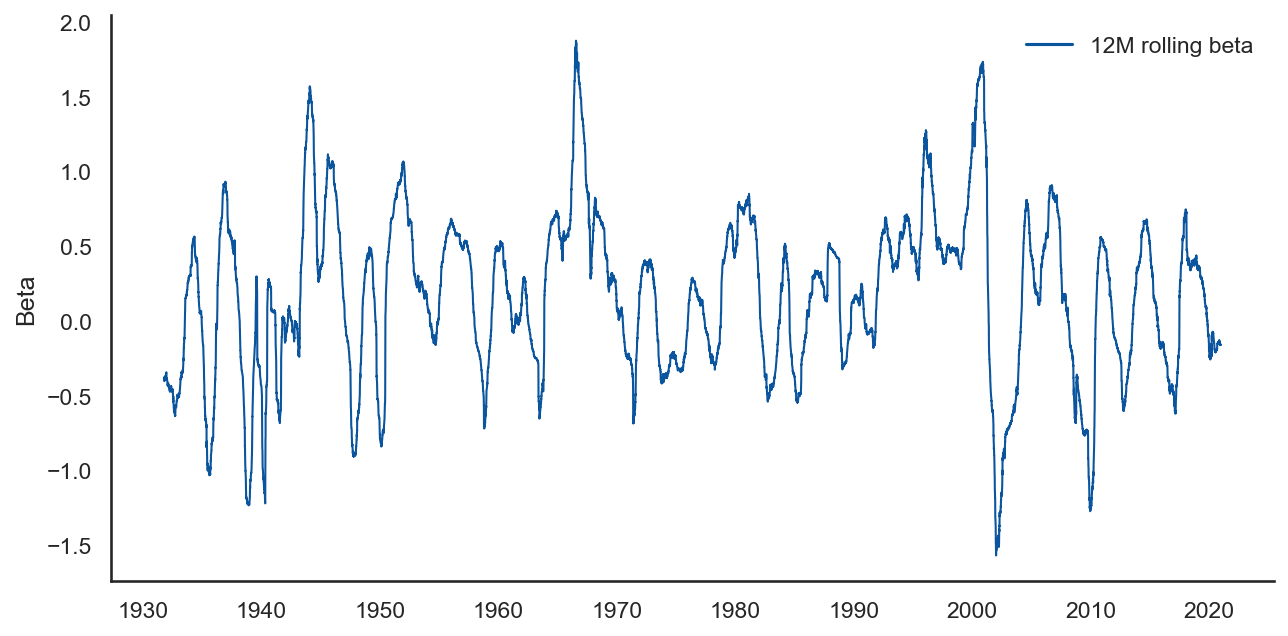

In [20]:
# Estimating rolling beta 12M
y=mom_results
X=sm.add_constant(excess_market)
rols = RollingOLS(y, X, window=252, min_nobs=252) #don't include NaN values
res_12M = rols.fit()
res_12M.params

# Plotting rolling betas
plt.figure(figsize=(10,5), dpi=150)
ax = plt.gca()
plt.plot(res_12M.params[0], label="12M rolling beta")
plt.legend(loc="upper right", edgecolor='white')
plt.ylabel('Beta', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for line in ax.get_lines():
    line.set_linewidth(1)

Start date,1931-01-02
End date,2020-12-31
Total months,1121
,Backtest
Annual return,11.1%
Cumulative returns,1913314.9%
Annual volatility,19.9%
Sharpe ratio,0.63
Calmar ratio,0.15
Stability,0.97
Max drawdown,-75.1%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,75.14,1932-05-31,1939-09-11,1950-04-14,4664
1,74.34,2008-07-14,2009-09-22,NaT,NaN
2,68.83,2000-03-09,2001-01-19,2007-09-25,1969
3,37.92,1931-01-03,1931-03-02,1932-04-07,329
4,31.14,1980-11-28,1981-07-14,1982-05-26,389


Stress Events,mean,min,max
Lehman,-0.44%,-7.64%,7.01%
EZB IR Event,0.01%,-1.71%,1.69%
Flash Crash,0.08%,-1.55%,4.26%
Apr14,-0.24%,-3.35%,2.47%
GFC Crash,0.08%,-10.81%,8.95%


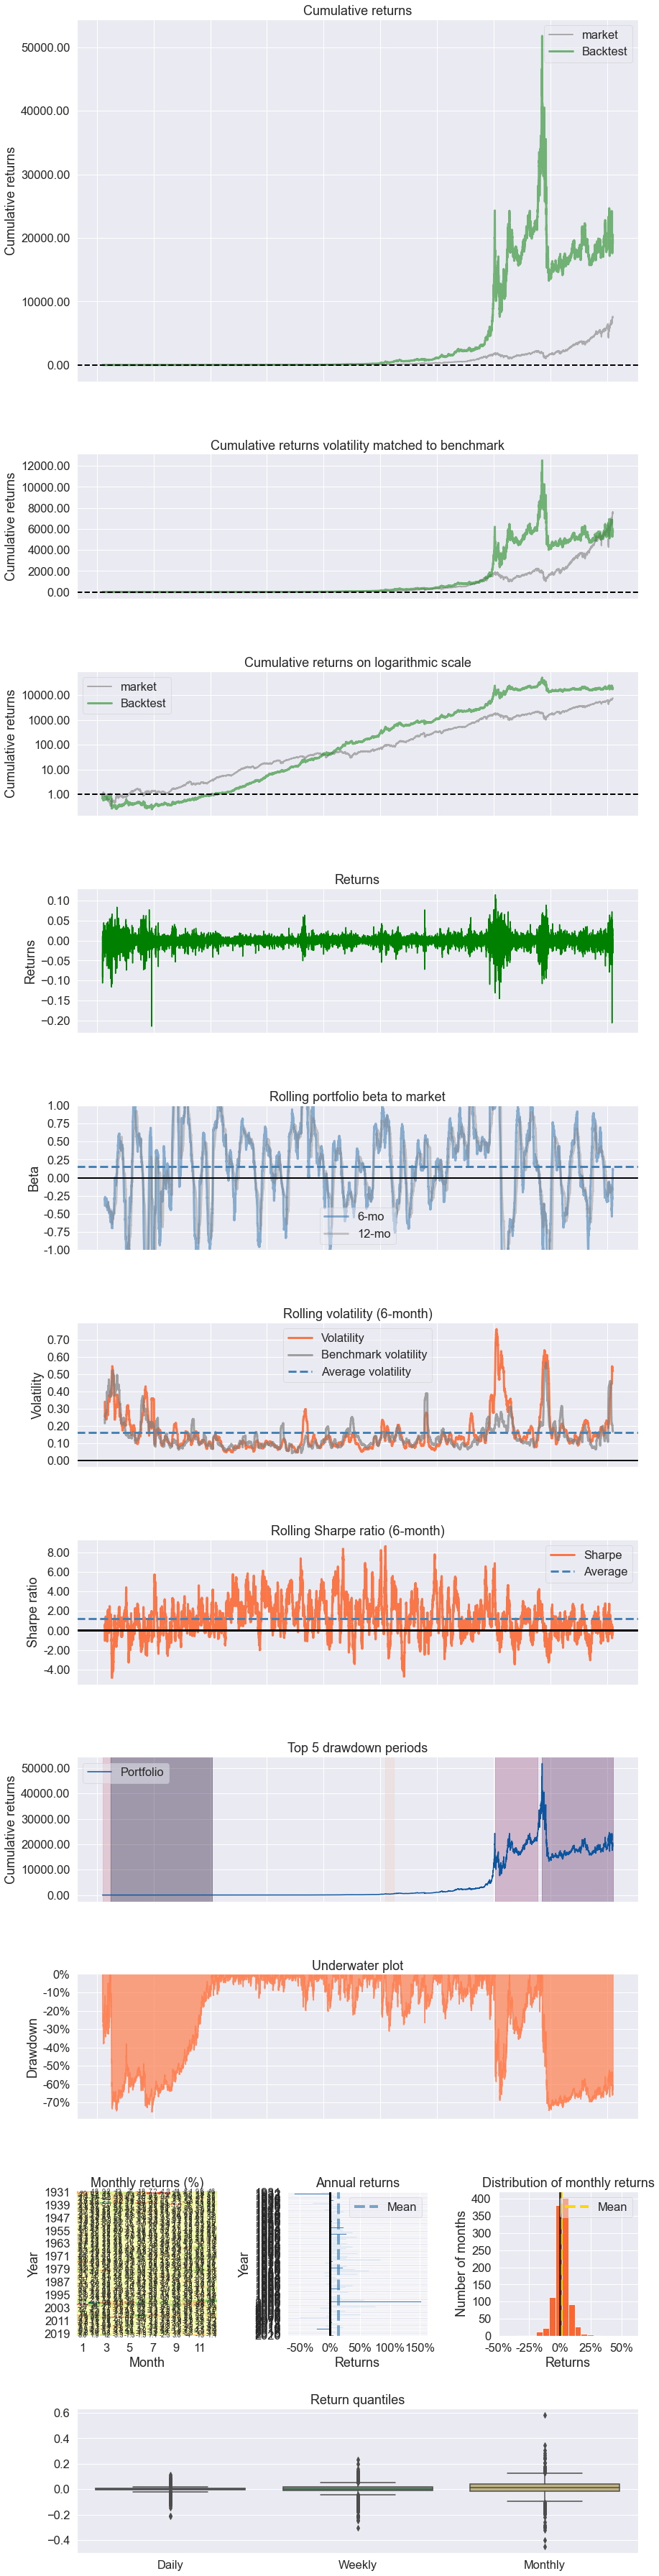

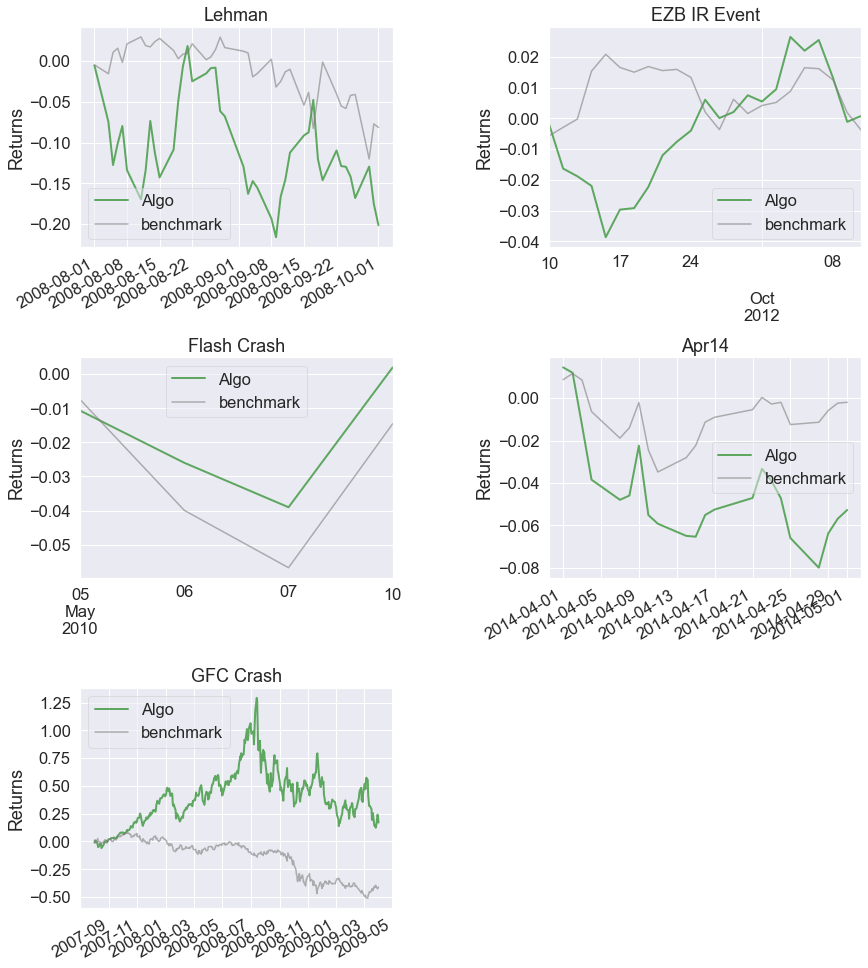

In [21]:
# Get overview
pf.create_full_tear_sheet(mom_results_ret, benchmark_rets=market)

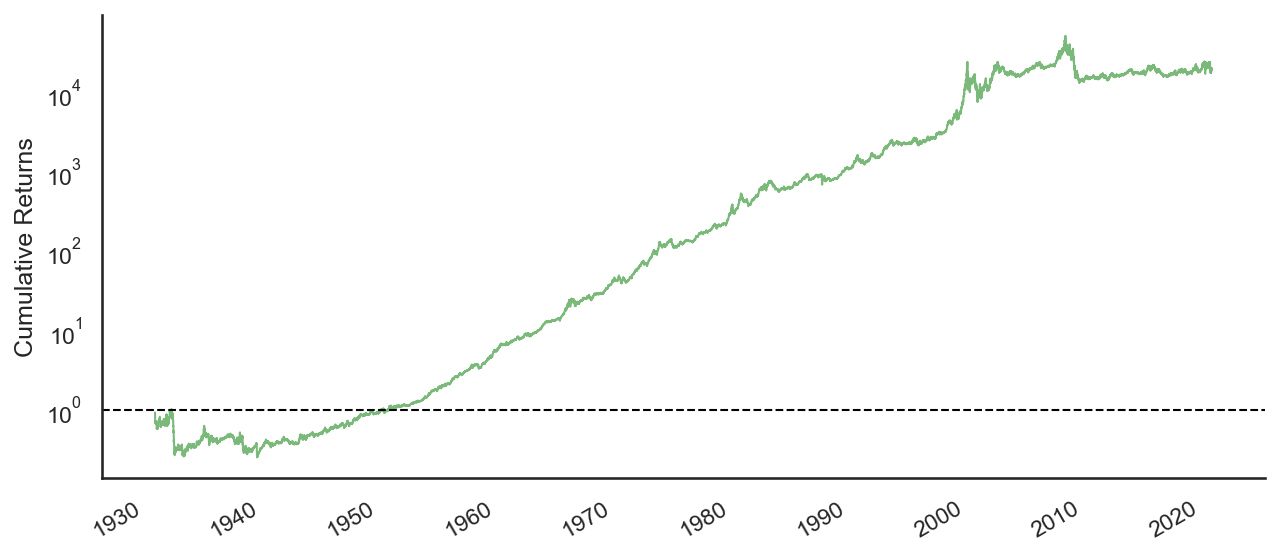

In [22]:
# Cumulative Returns 
# NOTE: We apply returns here, not excess returns

plt.figure(figsize=(10, 10), dpi=150)

plt.subplot(2,1,1)
ax = plt.gca()
pf.plotting.plot_rolling_returns(mom_results_ret, kind='line')
ax.set_yscale('log')
plt.legend('', edgecolor='white',facecolor='white',  loc = 'upper left',)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("Cumulative Returns")
plt.xlabel("")

for line in ax.get_lines():
    line.set_linewidth(1)

No handles with labels found to put in legend.


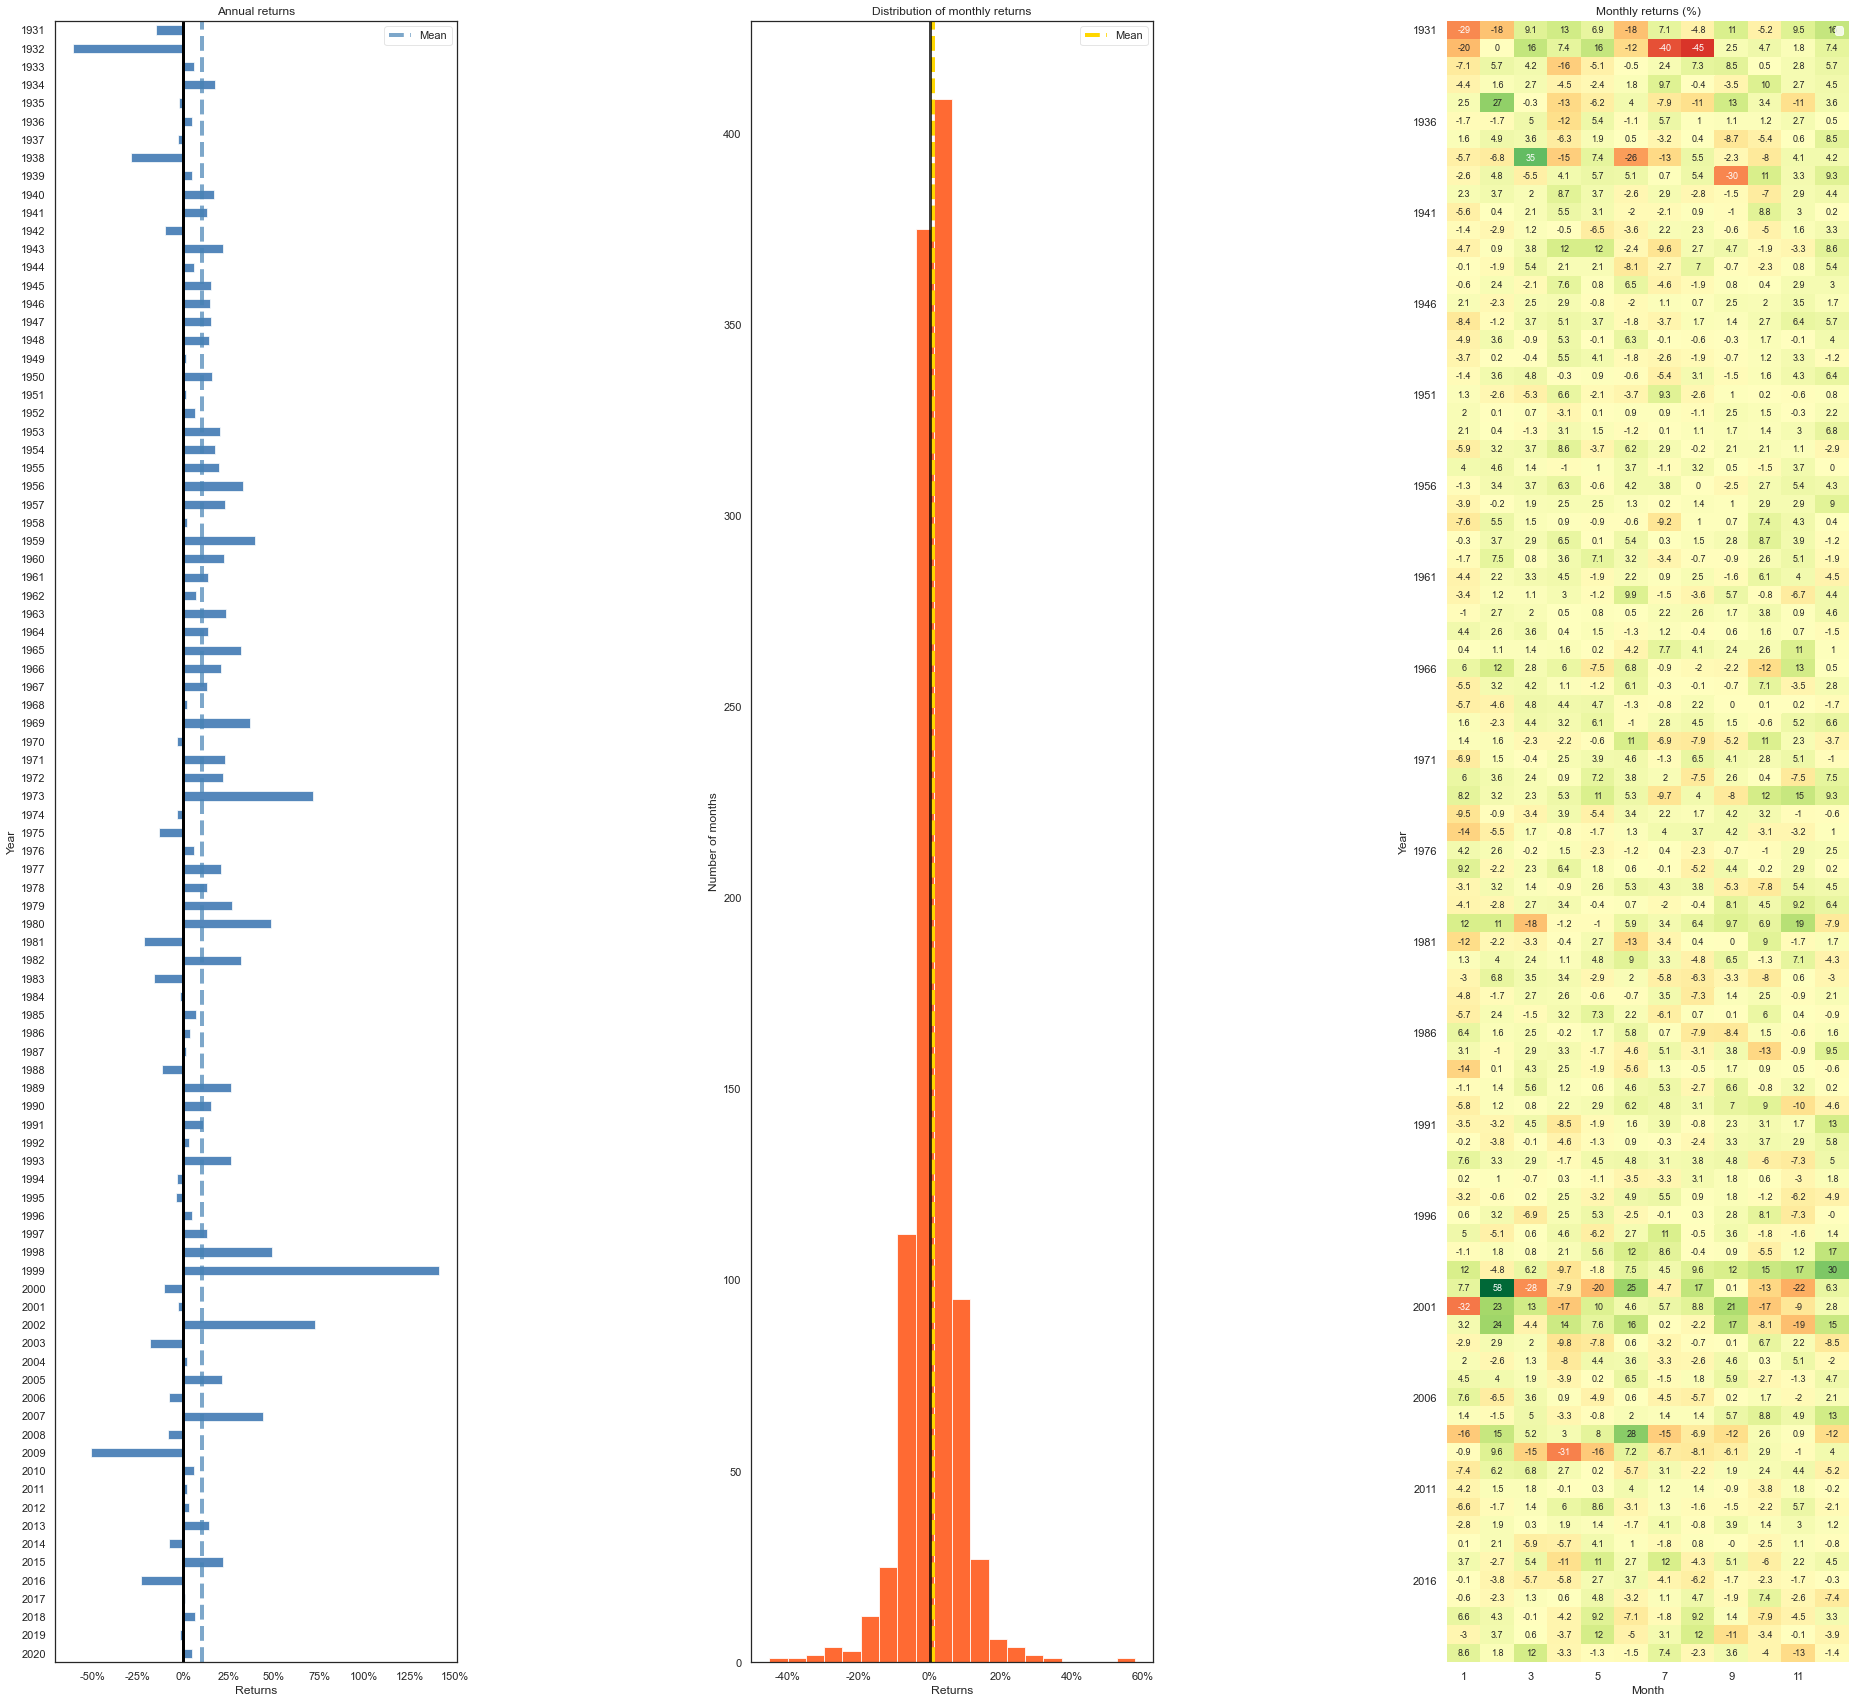

In [23]:
# Overview of monthly returns
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(mom_results)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(mom_results)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(mom_results)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
fig.set_size_inches(30,30)

No handles with labels found to put in legend.


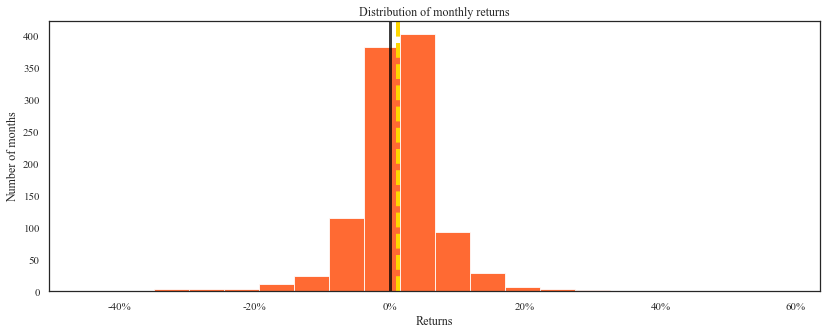

In [41]:
# Distribution of returns
# Note we use returns here, not excess returns
plt.Color = 'blue';
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_monthly_returns_dist(mom_results_ret)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
plt.tight_layout()
fig.set_size_inches(40,5)

No handles with labels found to put in legend.


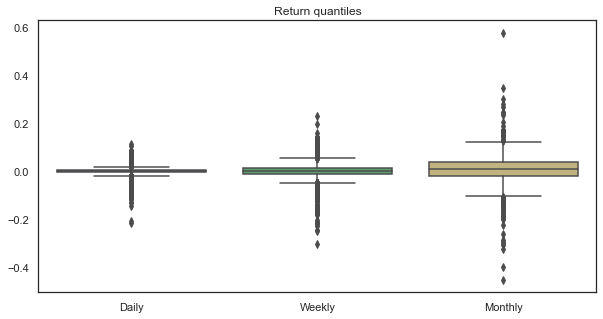

In [25]:
# Return quantiles
plt.figure(figsize=(10,5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')
pf.plot_return_quantiles(mom_results);

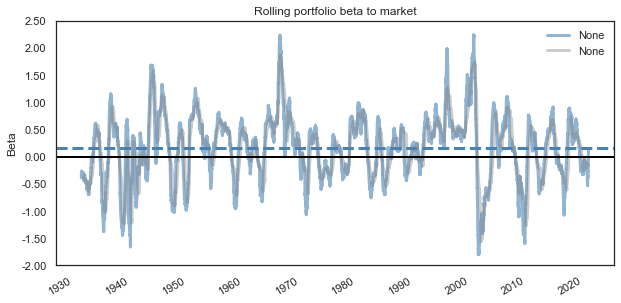

In [26]:
# Rolling beta
plt.figure(figsize=(10,5))
pf.plot_rolling_beta(mom_results, market);
plt.ylim([-2, 2.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

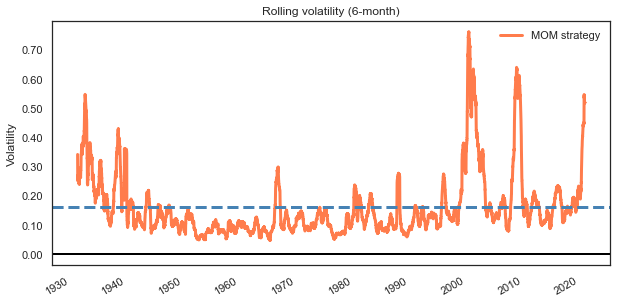

In [27]:
# Rolling volatility
plt.figure(figsize=(10,5))
pf.plot_rolling_volatility(mom_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

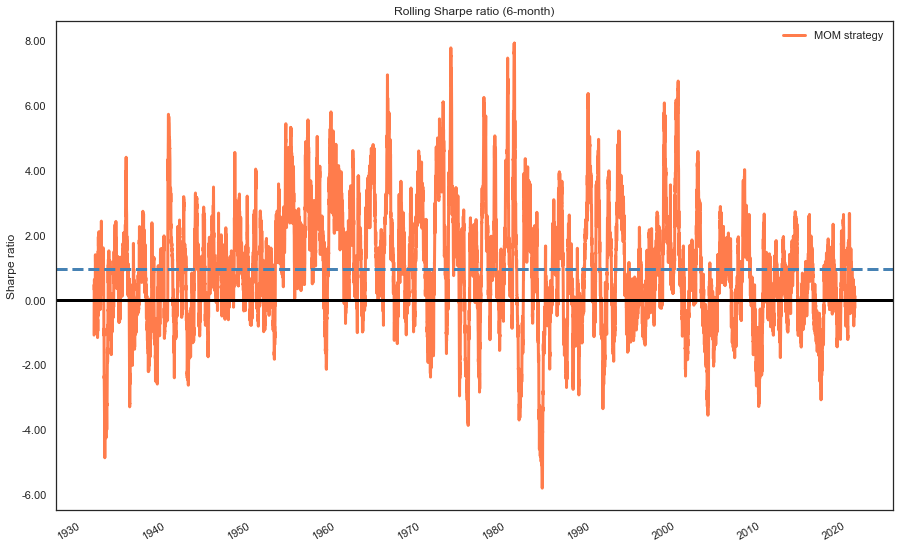

In [28]:
# Rolling sharpe ratio
plt.figure(figsize=(15,10))
pf.plot_rolling_sharpe(mom_results);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

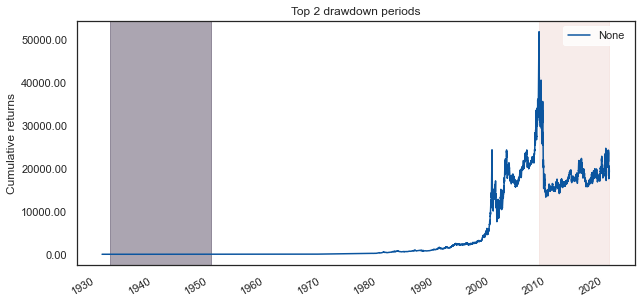

In [29]:
# Drawdown
plt.figure(figsize=(10,5))
pf.plot_drawdown_periods(mom_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(edgecolor='white',facecolor='white')

Text(0.5, 0, '')

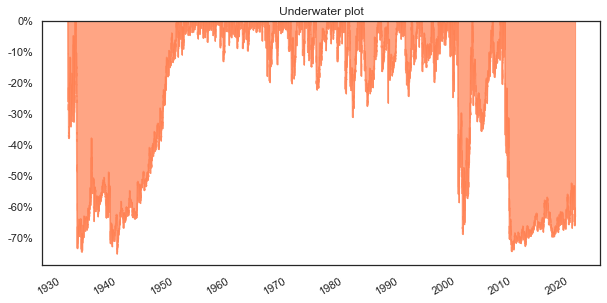

In [30]:
# Drawdown: Underwater plot
plt.figure(figsize=(10,5))
pf.plot_drawdown_underwater(mom_results_ret);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend("", edgecolor='white',facecolor='white')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("")
plt.xlabel("")

In [31]:
print("The Annual Exc. Return of the MOM is: ", empyrical.annual_return(mom_results)*100)
print('MOM T-stat excess returns:', stats.ttest_1samp(mom_results, 0.0))
print("The Volatility of the MOM is: ", empyrical.annual_volatility(mom_results)*100)
print("The alpha of the MOM is: ", empyrical.alpha(mom_results,excess_market)*100)
print("The Beta of the MOM is: ", empyrical.beta(mom_results,excess_market))
print("The Sharpe of the MOM is: ", empyrical.sharpe_ratio(mom_results))
print("The Sortino of the MOM is: ", empyrical.sortino_ratio(mom_results))
print("MD of the MOM is: ", empyrical.max_drawdown(mom_results_ret)*100)

The Annual Exc. Return of the MOM is:  7.724584096243792
MOM T-stat excess returns: Ttest_1sampResult(statistic=4.592398283698917, pvalue=4.404465050173314e-06)
The Volatility of the MOM is:  19.87755100758489
The alpha of the MOM is:  10.39043111779121
The Beta of the MOM is:  -0.056551074960712454
The Sharpe of the MOM is:  0.4749446027318571
The Sortino of the MOM is:  0.6398925512741718
MD of the MOM is:  -75.14068653293387


In [32]:
# Testing estimated alpha and beta
y=mom_results
X=sm.add_constant(excess_market)
model = sm.OLS(y, X)
results = model.fit()
params = results.params

# Print beta, alpha and t-stats
print('Beta:', params[0])
print('Alpha:', params['const']*252)
print('')
print(results.t_test([2, 0]))

Beta: -0.05655107496071297
Alpha: 0.09887266080336138

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0008      0.000      4.813      0.000       0.000       0.001


In [33]:
mom_monthly = empyrical.stats.aggregate_returns(mom_results_ret,'monthly')

In [34]:
mom_monthly_df = pd.DataFrame()
mom_monthly_df['ret'] = mom_monthly

In [35]:
# NOTE: This is not excess returns
(mom_monthly_df.sort_values('ret')*100).head(10)

ret
1932 8  -45.157657
     7  -39.759223
2001 1  -32.041064
2009 4  -30.566734
1939 9  -29.661660
1931 1  -29.290554
2000 3  -28.097408
1938 6  -25.912720
2000 11 -21.854487
1932 1  -19.683228

In [36]:
# NOTE: This is not based on excess returns
scipy.stats.skew(mom_results_ret)

-1.2492592347432643

In [37]:
mom_monthly_df['1+ret'] = mom_monthly_df['ret']+1 
mom_monthly_df['cum_ret'] = mom_monthly_df['1+ret'].cumprod()

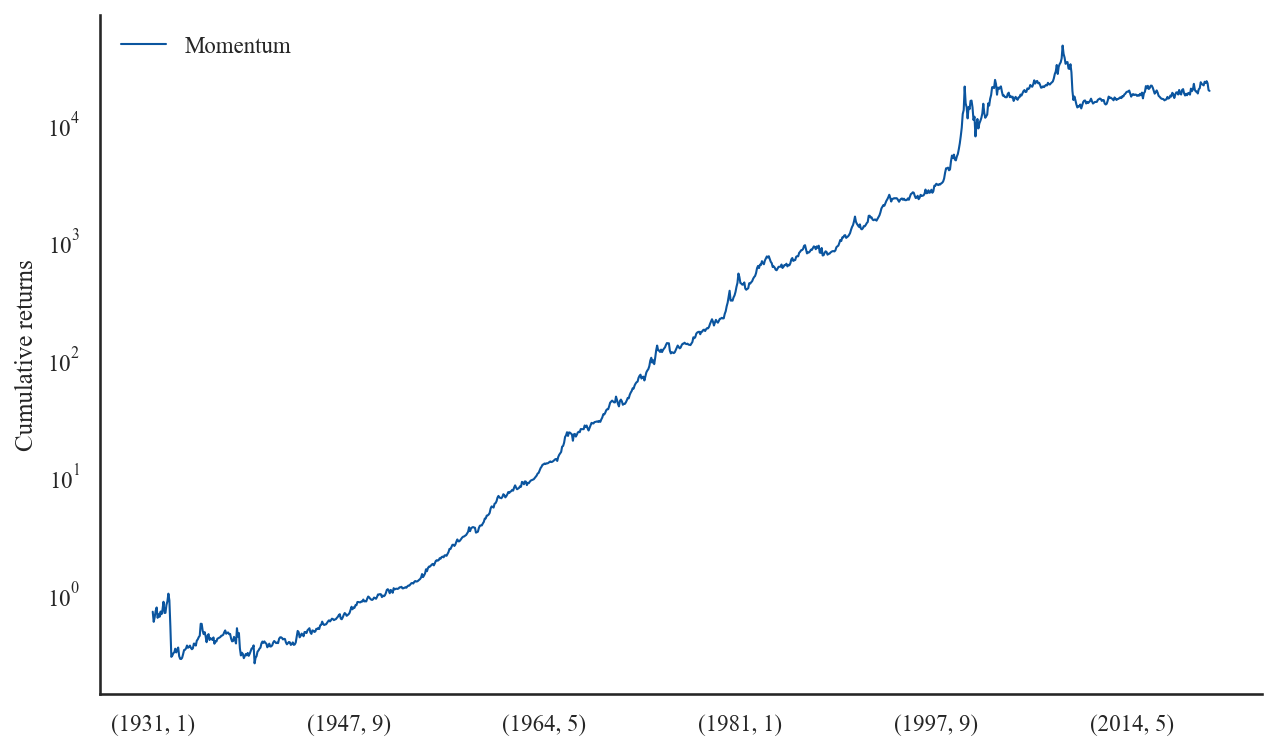

In [38]:
# Cumulative return
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

plt.rcParams["font.family"] = "Times New Roman"

figure(figsize=(10, 6), dpi=150)
ax = plt.gca()
mom_monthly_df.plot(kind='line', y='cum_ret', linewidth=1, ax=ax)
plt.ylabel("Cumulative returns")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log') 
plt.legend(['Momentum'], loc = 'upper left', edgecolor='white',facecolor='white')

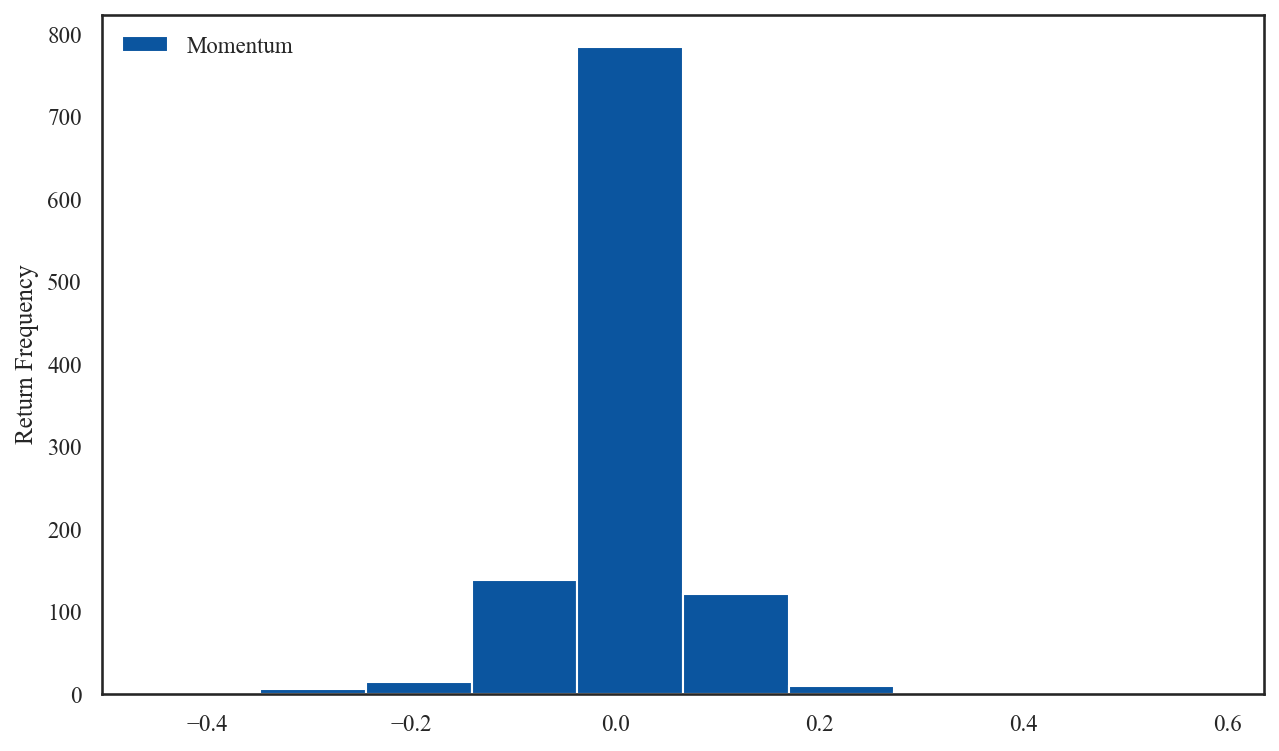

In [48]:
# Return dist
figure(figsize=(10, 6), dpi=150)
plt.hist(mom_monthly_df['ret'])
plt.ylabel("Return Frequency")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log') 
plt.legend(['Momentum'], loc = 'upper left', edgecolor='white',facecolor='white')